# Hybird Sorting, Timsort

## Hypothesis
I think that the value of K when timsort is quickest will be around 750, which is slightly less than the crossover point between insertion and merge sort found in problem 1. I also hypothesize that timsort will be significantly faster than both insertion and merge sort.

## Methods
The code for this problem can be found in this [github repo](https://github.com/kevinmcmahon22/CSE-830-HW4/tree/main/timsort). The c++ code was compiled with ```g++ timsort.cpp``` and ran by referring to the executable ```a.exe [filename] [K (optional)]```, where filename is the output file and K is the size of a vector slice when the user should switch to insertion sort. If no K is provided the code will be run over a wide range of K. I took most of the same code from *sorts.cpp* to use in *timsort.cpp* but made minor modifications to the InsertionSort function to sort any range of elements in place, and replaced the base case in MergeSort with a call to InsertionSort. Like problem 1 I also compiled using `g++ timsort.cpp -O2` and ran `a.exe compare_sorts_o2 [K]` to compare the O2 optimized runs of all three algorithms.

For problem 1 I used a variable to specify the seed for Mersenne Twister and compiled/run several times. For this problem I decided to dynamically define the seed using the current time, which always increases. I debated using a different MT for each iteration, but I decided that the dynamic seed and many hundreds of iterations for each value of K would provide enough variance among the data to be sorted.

This problem consisted of two parts, finding an optimal K and comparing timsort with optimal K to insertion and merge sorts. For this reason two Python functions are provided below to plot the information specified by the command line arguments.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def plot_timsort(filename):
    csvfile = open(filename)
    reader = csv.reader(csvfile)
    
    first_line = next(reader)
    
    x, timsort = [], []
    
    plt.figure(figsize=(12,9))
    
    if len(first_line) == 2:
        vec_size = first_line[0]
        repetitions = first_line[1]
        title = 'Finding Optimal K for Timsort'
        y_axis = 'Time to sort {} random vectors of size {}, (seconds)'.format(repetitions, vec_size)
        x_axis = 'Value of K, range from {} to {}'.format(5, 400)
        
        for row in reader:
            x.append(row[0])
            timsort.append(float(row[1]))
        plt.plot(x, timsort)
        
    else:
        K = first_line[0]
        Kmin = first_line[1]
        Kmax = first_line[2]
        repetitions = first_line[3]
        title = 'Timsort vs. Insertion sort vs. Merge sort'.format(K)
        y_axis = 'Time to sort {} random vectors, (seconds)'.format(repetitions)
        x_axis = 'Size of vector'
        
        # Plot timing data for timsort with given K
        tim2, tim3 = [], []
        for row in reader:
            x.append(row[0])
            timsort.append(float(row[1]))
            tim2.append(float(row[2]))
            tim3.append(float(row[3]))
        plt.plot(x, timsort, label = 'Timsort, K = {}'.format(K))
        plt.plot(x, tim2, label = 'Timsort, K = {}'.format(Kmin))
        plt.plot(x, tim3, label = 'Timsort, K = {}'.format(Kmax))
        
        # Modify title if using O2 optimizations
        file = 'sorts'
        if 'o2' in filename:
            title += ', compiled with O2 optimizations'
            file += '_o2'
        file += '.csv'
        
        # Plot data from merge and insertion sort, problem 1
        ins_mer_reader = csv.reader(open('../merge_v_insertion/{}'.format(file)))
        insertion, merge = [], []
        next(ins_mer_reader)
        for row in ins_mer_reader:
            insertion.append(float(row[1]))
            merge.append(float(row[2]))
        plt.plot(x, insertion, label = 'Insertion sort')
        plt.plot(x, merge, label = 'Merge sort')
        plt.legend()

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)

In [84]:
files = ['timsort.csv', 'compare_sorts.csv', 'compare_sorts_o2.csv']

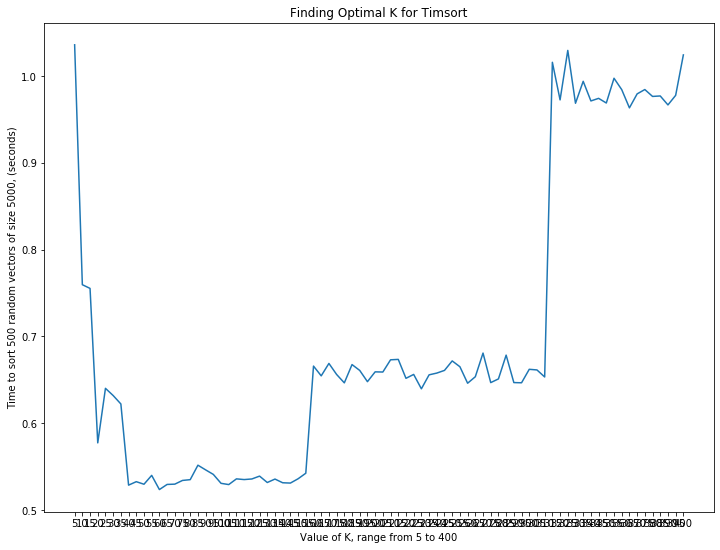

In [91]:
plot_timsort(files[0])

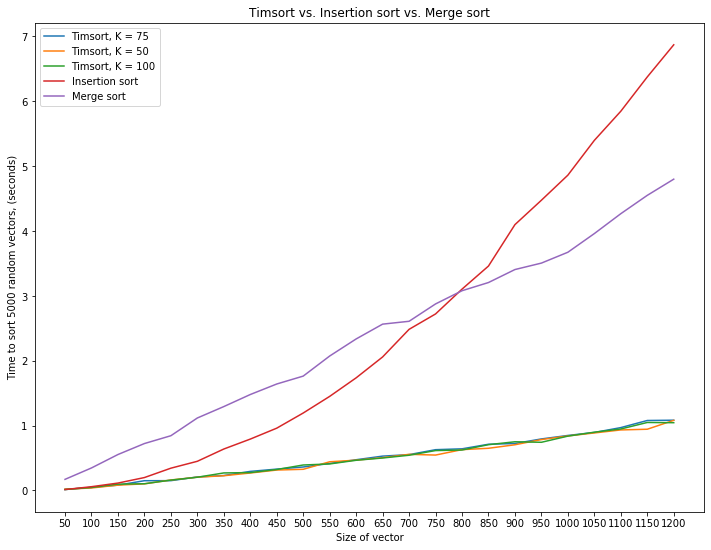

In [92]:
plot_timsort(files[1])

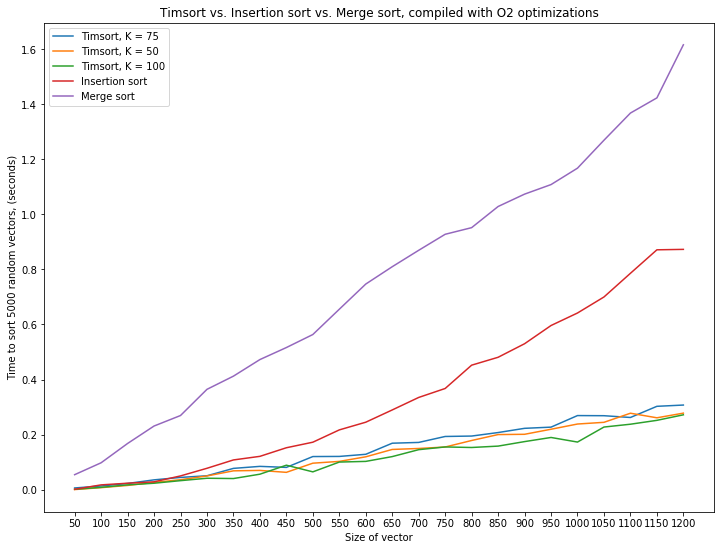

In [88]:
plot_timsort(files[2])

## Results
The plot for varying K shows an almost stepwise increase in the runtime for certain ranges of K. These jumps appeared between the values of 155-160 and 310-315. For larger values of K runtime appears to be as efficient as not using timsort at all. Timsort unsuprisingly performed better than insertion and merge sort compiled with and without optimizations. In addition, the complexity of timsort appears to be linear or close to linear for both optimized and non-optimized runs.

## Discussion
The stepwise nature of K values for timsort makes sense because of how merge sort works. Merge sort recursively cuts a vector in half, so the size will decrease exponentially. Therefore, an exponential decrease will bring the sub vector size under K for a larger range of numbers since the original vector size is kept constant. Even though the results show similar results for a K between 50 and 150, empirically the optimal K was found to be 75 on a consistent basis by running the C++ code and plotting the result several times. Changing the size of the original vector yielded similar results. Although I am confident in my answer, I haven't done enough testing on vector size vs. K because the program did take a decent amount of time to run with just 1 vector size being tested.

Merge sort was designed to be O(nlogn), so it makes sense that it performs much better than the O(n^2) algorithms insertion and merge sort. The plots above appear to be roughly linear, but I'm sure if they were extended for a large enough vector size we would see more of the log(n) term of the complexity creep in. Initially I only plotted 1 value of K, but I decided to additionally plot a K below and above the chosen K to graphically prove that this K was optimal. This required me removing an instance of pass by reference, which was messing up my answers initially. The resulting plots show that all values of K perform roughly similar to each other. This is not suprising to me given the step wise nature of the first plot for optimal K. The optimized plot shows much more variance based on which K is chosen, which may be explained by the nature of optimizations performed.

One fascinating discovery was that using a seed corresponding to the time since 1970 in milliseconds appeared to smooth out the lines for all plots. I went back to the first problem and used the same seed initialization to see if the results would look better. Sure enough, the plots had no more jagged hills and valleys and the visible change was even more drastic than for timsort. Initially I just did this small change to provide some variety between runs, but seeing the results drastically improve means I will be using a variable seed for any random number generator I create from now on. 

## Conclusion
Timsort with a K of around 75 will perform markedly better than both insertion and merge sort.